# Optical Character Recognition (OCR) API demonstration

## Model creation

**IMPORTANT** : to convert the models, you should install `pytorch` (GPU compatibility is **not** required) : `pip install torch`.

### Scene Text Detection model : EAST

The EAST scene-text detector is inspired from [this pytorch implementation](https://github.com/SakuraRiven/EAST), from which you can download the available `east_vgg16.pth` file, and put it in the `pretrained_models/pretrained_weights` folder ! The below cell will automatically convert the model to `tensorflow`. See [the detection project](https://github.com/yui-mhcp/detection) for more example of EAST usage ;)

In [1]:
from models.detection import EAST

detector = EAST(
    nom = 'east', labels = 'text', input_size = (None, None, 3)
)

print(detector)

Initializing model with kwargs : {'model': {'architecture_name': 'VGGBNUNet', 'input_shape': (None, None, 3), 'output_dim': [1, 4, 1], 'final_activation': ['sigmoid', 'sigmoid', 'sigmoid', 'softmax'], 'final_name': ['score_map', 'geo_map', 'theta_map', 'class_map']}}
Weights transfered successfully !
Initializing submodel : `model` !
Submodel model saved in pretrained_models\east\saving\model.json !
Model east initialized successfully !

========== east ==========
Sub model model
- Inputs 	: (None, None, None, 3)
- Outputs 	: [(None, None, None, 1), (None, None, None, 4), (None, None, None, 1)]
- Number of layers 	: 95
- Number of parameters 	: 15.099 Millions
- Model not compiled

Already trained on 0 epochs (0 steps)

- Image size : (None, None, 3)
- Resize config : {'antialias': True}
- Normalization style : east
- Labels (n = 1) : ['text']



### OCR model : CRNN

The available pretrained models currently come from the `easyocr` open-source library. The library is however not required to be installed as I simply downloads their config / weights files, and convert the model to `tensorflow` !

The full list of available languages / models available in the `custom_architectures/crnn_arch.py` file ;) By default, the below cell will load the `english` pretrained model.

In [2]:
from models.ocr import CRNN

model = CRNN(
    nom = 'crnn_en', lang = 'english', pretrained_lang = 'english'
)

print(model)

Initializing model with kwargs : {'model': {'architecture_name': 'CRNN', 'input_shape': (64, None, 1), 'output_dim': 97, 'pretrained': 'english_g2'}}


100%|████████████████████████████████████████████████████████████████████████████| 13.4M/13.4M [00:01<00:00, 10.9MiB/s]


Weights transfered successfully !
Initializing submodel : `model` !
Submodel model saved in pretrained_models\crnn_en\saving\model.json !
Model crnn_en initialized successfully !

========== crnn_en ==========
Sub model model
- Inputs 	: (None, 64, None, 1)
- Outputs 	: (None, None, 97)
- Number of layers 	: 33
- Number of parameters 	: 3.778 Millions
- Model not compiled

Transfer-learning from : easyocr_english_g2
Already trained on 0 epochs (0 steps)

- Image size : (64, None, 1)
- Resize config : {'method': 'bilinear', 'antialias': True, 'pad_mode': 'repeat_last', 'preserve_aspect_ratio': True, 'manually_compute_ratio': True, 'target_multiple_shape': 64}
- Normalization style : easyocr
- Language : english
- Vocabulary (size = 97) : ['<blank>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', ...]



## OCR demonstration

To perform OCR on an image, simply give the filename to the `ocr` method plus the expected language / model's name, and that's it ! Check the `BaseOCR.predict` method for a full list of available configuration ;)

Note that the last two boxes have been combined (by default `combine = True`), as they have been detected as 2 separate boxes. As the text is descending, the two boxes have been identified as 2 lines (and 1 continuous line), which can be solved by adapting the combination thresholds or by using angles in the combination process (which is not done yet, but probably in a future version ;) ).

It is normal that the `brücke` has been translated to `bricke` as the model is an english-based model : it does not have the `ü ` in its vocabulary. To solve this, you can set the `pretrained_lang` to `latin` to get a model trained on general latin alphabet. However, the english model seems to be a bit better than the latin one in some cases.

Model restoration...
Initializing submodel : `model` !
Successfully restored model from pretrained_models/crnn_en/saving/model.json !
Model crnn_en initialized successfully !
Model restoration...
Initializing submodel : `model` !
Successfully restored model from pretrained_models/east/saving/model.json !
Model east initialized successfully !


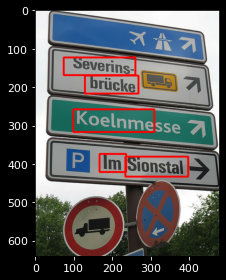

Text (score [-0.122]) : ~Severins-


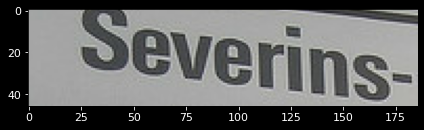

Text (score [-0.115]) : bricke


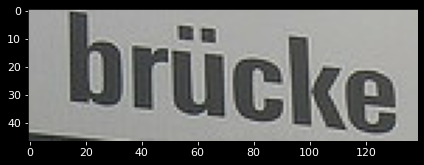

Text (score [-0.]) : Koelnme


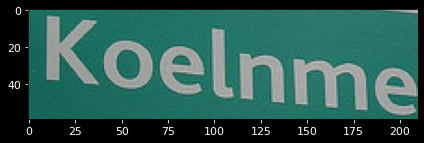

Text (score [-0.01 -0.  ]) : Im
Sionstal


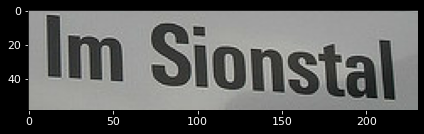

In [1]:
from models.ocr import ocr

filename = 'text.jpg'

result = ocr(filename, model = 'crnn_en', detector = 'east', save = False, display = True)